1. Answer the questions
   1. Derive an analytical solution to the regression problem. Use a vector form of the equation.
   2. What changes in the solution when L1 and L2 regularizations are added to the loss function.
   3. Explain why L1 regularization is often used to select features. Why are there many weights equal to 0 after the model is fit?
   4. Explain how you can use the same models (Linear regression, Ridge, etc.) but make it possible to fit nonlinear dependencies.

\begin{align*}
\arg \min_w & \left( \| y - Xw \|_2^2 \right) \\
\| y - Xw \|_2^2 &= (y - Xw)^\top (y - Xw) \\
&= \left( y^\top - (Xw)^\top \right) (y - Xw) \\
&= y^\top y - y^\top Xw - (Xw)^\top y + (Xw)^\top Xw \\
&= y^\top y - 2y^\top Xw + w^\top X^\top X w \\
\nabla_w \left( y^\top y - 2y^\top Xw + w^\top X^\top X w \right) &= 0 \\
-2 X^\top y + \nabla_w \left( w^\top X^\top X w \right) &= 0 \\
\nabla_w \left( w^\top X^\top X w \right) &= 2 X^\top y \\
2 X^\top X w &= 2 X^\top y \\
X^\top X w &= X^\top y \\
w &= (X^\top X)^{-1} X^\top y
\end{align*}


В функцию потерь добавляется новый член - собственно регуляризация. Для L2 регуляризации возможно аналитическое решение, для L1 регуляризации - нет (модуль - недиффиренцируемая функция)
Для L2 регуляризации аналитическое решение будет выглядеть следующим образом:
$$
\mathbf{w} = (X^\top X + \lambda I)^{-1} X^\top y
$$

Квадрат больше наказывает за большие веса и меньше за маленькие.

Добавим в качестве признака нелинейную функцию от оригинального признака -> модель будет работать как линейная комбинация неленейных функций от исходных признаков

2. Introduction — make all the preprocessing staff from the previous lesson
   1. Import libraries. 
   2. Read Train and Test Parts.
   3. Preprocess "Interest Level" feature.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

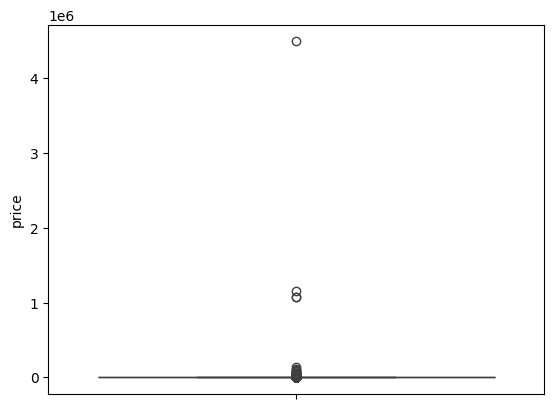

In [2]:
data = pd.read_json("../datasets/train.json")
sns.boxplot(data['price']);

In [3]:
data = data[data['price'] < 1E6]

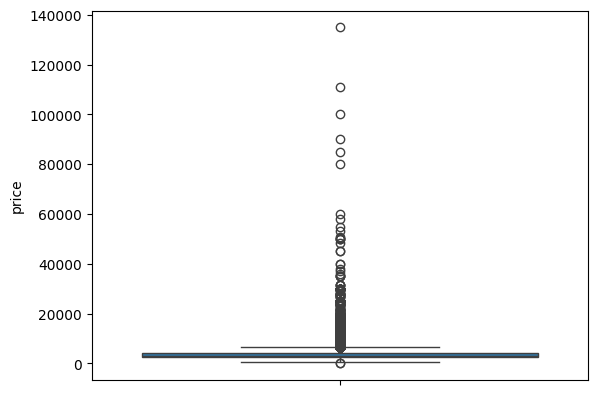

In [4]:
sns.boxplot(data['price']);

In [5]:
train, test = train_test_split(data, shuffle=True, random_state=21)
train['interest_level'] = train['interest_level'].map({'low':0, 'medium':1, 'high':2})
test['interest_level'] = test['interest_level'].map({'low':0, 'medium':1, 'high':2})

3. Intro data analysis part 2
   1. Let's generate additional features for better model quality. Consider a column called "Features". It consists of a list of highlights of the current flat. 
   2. Remove unused symbols ([,], ', ", and space) from the column.
   3. Get all values in each list and collect the result in one huge list for the whole dataset. You can use DataFrame.iterrows().
   4. How many unique values does a result list contain?
   5. Let's get acquainted with the new library — Collections. With this package you could effectively get quantity statistics about your data. 
   6. Count the most popular functions from our huge list and take the top 20 for this moment.
   7. If everything is correct, you should get next values:  'Elevator', 'CatsAllowed', 'HardwoodFloors', 'DogsAllowed', 'Doorman', 'Dishwasher', 'NoFee', 'LaundryinBuilding', 'FitnessCenter', 'Pre-War', 'LaundryinUnit', 'RoofDeck', 'OutdoorSpace', 'DiningRoom', 'HighSpeedInternet', 'Balcony', 'SwimmingPool', 'LaundryInBuilding', 'NewConstruction', 'Terrace'.
   8. Now create 20 new features based on the top 20 values: 1 if the value is in the "Feature" column, otherwise 0.
   9. Extend our feature set with 'bathrooms', 'bedrooms', 'interest_level' and create a special variable feature_list with all feature names. Now we have 23 values. All models should be trained on these 23 features.

In [6]:
one_huge_list = []
for i in train.iterrows():
    one_huge_list.extend(i[1]['features'])


In [7]:
len(set(one_huge_list))

1286

In [8]:
import collections
cntr = collections.Counter(one_huge_list)
feature_set = [i[0] for i in cntr.most_common(20)]
feature_set

['Elevator',
 'Hardwood Floors',
 'Cats Allowed',
 'Dogs Allowed',
 'Doorman',
 'Dishwasher',
 'No Fee',
 'Laundry in Building',
 'Fitness Center',
 'Pre-War',
 'Laundry in Unit',
 'Roof Deck',
 'Outdoor Space',
 'Dining Room',
 'High Speed Internet',
 'Balcony',
 'Swimming Pool',
 'Laundry In Building',
 'New Construction',
 'Terrace']

In [9]:
for feauture in feature_set:
    train[feauture] = train.apply(axis=1, func= lambda x: feauture in x['features'])
    test[feauture] = test.apply(axis=1, func= lambda x: feauture in x['features'])

train

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,Laundry in Unit,Roof Deck,Outdoor Space,Dining Room,High Speed Internet,Balcony,Swimming Pool,Laundry In Building,New Construction,Terrace
111801,1.0,3,ad67f6181a49bde19218929b401b31b7,2016-04-05 06:12:11,"GREAT RENOVATED BUILDING AND FEATURES, 24 HOUR...",Wall St.,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7067,6826121,-74.0101,...,False,False,False,False,False,False,False,False,False,False
54825,2.0,3,d0234abbc01a982d54e8d446acc03405,2016-05-16 12:49:47,Great 2BDR convertible to 3BDR with windows in...,"W34 Drmn, Gym, Rooftop,","[Cats Allowed, Dogs Allowed, No Fee, Doorman, ...",40.7522,7019955,-73.9940,...,False,True,False,False,False,False,False,True,False,False
84699,3.5,3,7fb6d9c24ba91ddf0af82c0e920421be,2016-04-14 05:35:18,The spectacular Penthouse 3 bedroom/3.5 bathro...,E 59th St.,"[Fireplace, Roof Deck, Dining Room, Balcony, D...",40.7615,6873118,-73.9662,...,True,True,True,True,False,True,False,False,False,True
98658,1.0,1,0,2016-04-18 01:19:00,NO FEE!!! This stunning 1 bedroom apartment is...,Water Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7031,6888470,-73.9914,...,False,False,False,False,False,False,False,False,False,False
89974,1.0,0,b0da4d9d2cd8040f3da40a134ad6ed51,2016-04-29 02:30:40,CooperCooper.com :: Web ID #055900; Access 100...,West 38th Street,"[Doorman, Fitness Center, Elevator, PublicOutd...",40.7518,6940410,-73.9849,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41353,1.0,3,0,2016-06-07 03:28:22,LOCATION: 143rd &amp; BroadwayPlease Contact O...,West 143,"[prewar, Dogs Allowed, Cats Allowed, LOWRISE, ...",40.8246,7119167,-73.9508,...,False,False,False,False,False,False,False,False,False,False
22644,1.0,2,c69a3f7f425d322719fdddc45f76af14,2016-06-21 13:04:20,SOPHISTICATED two bedroom in Chelsea...short d...,At Tenth Avenue,[],40.7540,7195968,-73.9992,...,False,False,False,False,False,False,False,False,False,False
15017,1.0,0,c1bcb85611d81b520a67c0828a9744b2,2016-06-27 11:57:58,This is a newly renovated studio in Murray Hil...,second ave,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.7460,7222132,-73.9754,...,False,False,False,False,False,False,False,True,False,False
13442,1.0,1,971a107601f98c26730e8f597e2df4fd,2016-06-11 03:39:29,"Newly Renovated 1 BEDROOM with eat-in kitchen,...",Hudson Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7339,7140553,-74.0066,...,False,False,False,False,False,False,False,False,False,False


In [10]:
feature_set.extend(['bathrooms', 'bedrooms', 'interest_level'])

4. Models implementation — Linear regression
   1. Implement a Python class for a linear regression algorithm with two basic methods — fit and predict. Use stochastic gradient descent to find optimal model weights. For better understanding, we recommend implementing separate versions of the algorithm with the analytical solution and non-stochastic gradient descent under the hood.
   2. Define the R squared (R2) coefficient and implement a function to calculate it.
   3. Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.
   4. Initialize LinearRegression() from sklearn.linear_model, fit the model, and predict the training and test parts as in the previous lesson.
   5. Compare the quality metrics and make sure the difference is small (between your implementations and sklearn).
   6. Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [11]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np

In [12]:
from abc import ABC, abstractmethod
class basic_sgd_regressor(ABC):
    def __init__(self, alpha=1):
        self.alpha = alpha
    
    @abstractmethod
    def grad(self, X, y):
        pass

    def calculate_loss(self, X, y):
        y_pred = self.predict(X)
        return np.linalg.norm(y_pred-y)

    def fit(self, X, y):
        X = np.asarray(X.astype('float64'))
        y = np.asarray(y.astype('float64'))
        self.w = np.ones(len(X[0]))
        self.w0 = 0
        self.lr = 0.001
        
        while True:
            old_loss = self.calculate_loss(X, y)

            ind = np.arange(len(X))
            np.random.shuffle(ind)
            X_shuf = X[ind]
            y_shuf = y[ind]
            
            for X_sample, y_sample in zip(X_shuf, y_shuf):

                X_sample = X_sample.reshape(1, -1)
                y_sample = np.array(y_sample)
                grad_w, grad_w0 = self.grad(X_sample, y_sample)

                self.w = self.w - self.lr * grad_w
                self.w0 = self.w0- self.lr * grad_w0

            self.lr = self.lr * 0.95
           
            if abs(old_loss - self.calculate_loss(X, y)) < 0.01:
                break

            
    def predict(self, X):
        X = np.asarray(X.astype('float64'))
        return X@self.w + self.w0
        
class my_linear_regressor(basic_sgd_regressor):
    def grad(self, X, y):
        grad_w = (2/len(X)) * (X.T@(X@self.w + self.w0 - y))
        grad_w0 = (2/len(X)) * np.sum(X@self.w + self.w0 - y)
        return grad_w, grad_w0


- The sum of squares of residuals, also called the residual sum of squares:

  $$
  SS_{\text{res}} = \sum_{i} (y_i - f_i)^2 = \sum_{i} e_i^2
  $$

- The total sum of squares (proportional to the variance of the data):

  $$
  SS_{\text{tot}} = \sum_{i} (y_i - \bar{y})^2
  $$

- The most general definition of the coefficient of determination is:

  $$
  R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
  $$


In [13]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true-y_pred)**2)
    ss_tot = np.sum((y_true-np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

In [14]:
import pandas as pd

In [15]:
mlr = my_linear_regressor()
mlr.fit(train[feature_set], train['price'])
mlr_pred_train = mlr.predict(train[feature_set])
mlr_pred_test = mlr.predict(test[feature_set])

slr = LinearRegression()
slr.fit(train[feature_set], train['price'])
slr_pred_train = slr.predict(train[feature_set])
slr_pred_test = slr.predict(test[feature_set])

mlr_mae = (mean_absolute_error(train['price'], mlr_pred_train), mean_absolute_error(test['price'], mlr_pred_test))
mlr_rmse = (root_mean_squared_error(train['price'], mlr_pred_train), root_mean_squared_error(test['price'], mlr_pred_test))
mlr_r2 = ((r_squared(train['price'], mlr_pred_train), r_squared(test['price'], mlr_pred_test)))

slr_mae = (mean_absolute_error(train['price'], slr_pred_train), mean_absolute_error(test['price'], slr_pred_test))
slr_rmse = (root_mean_squared_error(train['price'], slr_pred_train), root_mean_squared_error(test['price'], slr_pred_test))
slr_r2 = (r_squared(train['price'], slr_pred_train), r_squared(test['price'], slr_pred_test))

mae_table = pd.DataFrame({'model':('my_linear_regressor', 'sklearn_linear_regressor'), 'train':(mlr_mae[0], slr_mae[0]), 'test':(mlr_mae[1], slr_mae[1])})
rmse_table = pd.DataFrame({'model':('my_linear_regressor', 'sklearn_linear_regressor'), 'train':(mlr_rmse[0], slr_rmse[0]), 'test':(mlr_rmse[1], slr_rmse[1])})
r2_table = pd.DataFrame({'model':('my_linear_regressor', 'sklearn_linear_regressor'), 'train':(mlr_r2[0], slr_r2[0]), 'test':(mlr_r2[1], slr_r2[1])})


In [16]:
mae_table

,model,train,test
0,my_linear_regressor,843.925086,839.593682
1,sklearn_linear_regressor,843.991835,839.660643


In [17]:
rmse_table

,model,train,test
0,my_linear_regressor,1886.832960,1792.363803
1,sklearn_linear_regressor,1886.832893,1792.367076


In [18]:
r2_table

,model,train,test
0,my_linear_regressor,0.456862,0.468811
1,sklearn_linear_regressor,0.456862,0.468809


5. Regularized models implementation — Ridge, Lasso, ElasticNet    
   1. Implement Ridge, Lasso, ElasticNet algorithms: extend the loss function with L2, L1 and both regularizations accordingly.
   2. Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.
   3. Initialize Ridge(), Lasso(), and ElasticNet() from sklearn.linear_model, fit the model, and make predictions for the training and test samples as in the previous lesson.
   4. Compare quality metrics and make sure the difference is small (between your implementations and sklearn).
   5. Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [19]:
class my_ridge(basic_sgd_regressor):
    def grad(self, X, y):
        grad_w = (2/len(X)) * (X.T@(X@self.w + self.w0 - y)) + (2*self.alpha * self.w)
        grad_w0 = (2/len(X)) * np.sum(X@self.w + self.w0 - y)
        return grad_w, grad_w0
    
class my_lasso(basic_sgd_regressor):
    def grad(self, X, y):

        grad_w = (2/len(X)) * (X.T@(X@self.w + self.w0 - y)) + self.alpha * np.sign(self.w)
        grad_w0 = (2/len(X)) * np.sum(X@self.w + self.w0 - y)

        return grad_w, grad_w0  
        
class my_elastic_net(basic_sgd_regressor):
    def grad(self, X, y):

        grad_w = (2/len(X)) * (X.T@(X@self.w + self.w0 - y)) + (0.5 *2*self.w + 0.5*np.sign(self.w))
        grad_w0 = (2/len(X)) * np.sum(X@self.w + self.w0 - y)

        return grad_w, grad_w0  


In [20]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [21]:
model_definitions = [
    ('my_ridge', my_ridge()),
    ('sklearn_ridge', Ridge(alpha=len(train['price']))), #https://github.com/scikit-learn/scikit-learn/issues/21891
    ('my_lasso', my_lasso()),
    ('sklearn_lasso', Lasso()),
    ('my_elastic_net', my_elastic_net()),
    ('sklearn_elactic_net', ElasticNet())
]

model_names_list = []
train_maes, test_maes = [], []
train_rmses, test_rmses = [], []
train_r2s, test_r2s = [], []

for model_name, model_instance in model_definitions:

    model_instance.fit(train[feature_set], train['price'])
    pred_train = model_instance.predict(train[feature_set])
    pred_test = model_instance.predict(test[feature_set])

    model_names_list.append(model_name)

    train_maes.append(mean_absolute_error(train['price'], pred_train))
    test_maes.append(mean_absolute_error(test['price'], pred_test))

    train_rmses.append(root_mean_squared_error(train['price'], pred_train))
    test_rmses.append(root_mean_squared_error(test['price'], pred_test))

    train_r2s.append(r_squared(train['price'], pred_train))
    test_r2s.append(r_squared(test['price'], pred_test))

mae_table_reg = pd.DataFrame({
    'model': model_names_list,
    'train': train_maes,
    'test': test_maes
})

rmse_table_reg = pd.DataFrame({
    'model': model_names_list,
    'train': train_rmses,
    'test': test_rmses
})

r2_table_reg = pd.DataFrame({
    'model': model_names_list,
    'train': train_r2s,
    'test': test_r2s
})

In [22]:
mae_table_reg

,model,train,test
0,my_ridge,963.354330,939.746473
1,sklearn_ridge,963.365961,939.757778
2,my_lasso,843.142663,838.613210
3,sklearn_lasso,842.467840,837.735107
4,my_elastic_net,886.956665,866.991745
5,sklearn_elactic_net,887.073337,867.092953


In [23]:
rmse_table_reg

,model,train,test
0,my_ridge,2169.894265,2068.566446
1,sklearn_ridge,2169.890666,2068.563478
2,my_lasso,1886.859503,1792.159484
3,sklearn_lasso,1886.940589,1792.012071
4,my_elastic_net,2072.005220,1972.382255
5,sklearn_elactic_net,2072.160394,1972.523505


In [ ]:
r2_table_reg

,model,train,test
0,my_ridge,0.281676,0.292485
1,sklearn_ridge,0.281679,0.292487
2,my_lasso,0.456847,0.468932
3,sklearn_lasso,0.456800,0.469019
4,my_elastic_net,0.345025,0.356751
5,sklearn_elactic_net,0.344927,0.356659


6. Feature normalization
   1. First, write several examples of why and where feature normalization is mandatory and vice versa.
   2. Let's consider the first of the classical normalization methods — MinMaxScaler. Write a mathematical formula for this method.
   3. Implement your own function for MinMaxScaler feature normalization.
   4. Initialize MinMaxScaler() from sklearn.preprocessing.
   5. Compare the feature normalization with your own method and with sklearn.
   6. Repeat the steps from b to e for another normalization method StandardScaler.

Нормализация нужна - методы, где важна норма векторов; методы с регуляризацией (иначе большие коэффициенты у маленьких значений будут наказаны несправедливо) <br>
Не нужна - деревья


$$
\text{MinMaxScaler}(x) = \frac{x - \mathrm{min}}{\mathrm{max} - \mathrm{min}}
$$



In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [26]:
class my_min_max_scaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.max_values = {}
        self.min_values = {}

    def fit(self, data):
        data = data.copy().astype('float')
        for name in data.columns:
            self.max_values[name] = data[name].max()
            self.min_values[name] = data[name].min()
        return self
    
    def transform(self, data):
        data = data.copy().astype('float')
        for name in data.columns:
            data[name] = (data[name] - self.min_values[name])/(self.max_values[name] - self.min_values[name])
        return data.to_numpy()

In [27]:
myMinMaxScaler = my_min_max_scaler()
skMinMaxScaler = MinMaxScaler()
mmms = myMinMaxScaler.fit_transform(train[feature_set])
smms = skMinMaxScaler.fit_transform(train[feature_set])

In [28]:
np.isclose(mmms, smms).all()

np.True_


$$
z = \frac{x - \mu}{\sigma}
$$

In [29]:
class my_standard_scaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean = {}
        self.dev = {}

    def fit(self, data):
        data = data.copy().astype('float')
        for name in data.columns:
            self.mean[name] = data[name].mean()
            self.dev[name] = data[name].std(ddof = 0)
        return self
    
    def transform(self, data):
        data = data.copy().astype('float')
        for name in data.columns:
            data[name] = (data[name] - self.mean[name])/self.dev[name]
        return data.to_numpy()

In [30]:
myStandardScaler = my_standard_scaler()
skStandardScaler = StandardScaler()
mss = myStandardScaler.fit_transform(train[feature_set])
sss = skStandardScaler.fit_transform(train[feature_set])

In [31]:
np.isclose(mss, sss).all()

np.True_

7. Fit models with normalization
   1. Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with MinMaxScaler.
   2. Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with StandardScaler.
   3. Add all results to our dataframe with metrics on samples.


In [32]:
train_min_max = train.copy()
test_min_max = test.copy()

train_min_max[feature_set] = myMinMaxScaler.fit_transform(train_min_max[feature_set])
test_min_max[feature_set] = myMinMaxScaler.transform(test_min_max[feature_set])

In [33]:
model_definitions = [
    ('my_ridge_scaled_min_max', my_ridge()),
    ('sklearn_ridge_scaled_min_max', Ridge(alpha=len(train['price']))),
    ('my_lasso_scaled_min_max', my_lasso()),
    ('sklearn_lasso_scaled_min_max', Lasso()),
    ('my_elastic_net_scaled_min_max', my_elastic_net()),
    ('sklearn_elactic_net_scalet_min_max', ElasticNet()) 
]

model_names_list = []
train_maes, test_maes = [], []
train_rmses, test_rmses = [], []
train_r2s, test_r2s = [], []

for model_name, model_instance in model_definitions:


    model_instance.fit(train_min_max[feature_set], train_min_max['price'])
    pred_train = model_instance.predict(train_min_max[feature_set])
    pred_test = model_instance.predict(test_min_max[feature_set])

    model_names_list.append(model_name)


    train_maes.append(mean_absolute_error(train_min_max['price'], pred_train))
    test_maes.append(mean_absolute_error(test_min_max['price'], pred_test))

    train_rmses.append(root_mean_squared_error(train_min_max['price'], pred_train))
    test_rmses.append(root_mean_squared_error(test_min_max['price'], pred_test))

    train_r2s.append(r_squared(train_min_max['price'], pred_train))
    test_r2s.append(r_squared(test_min_max['price'], pred_test))


mae_table_min_max = pd.DataFrame({
    'model': model_names_list,
    'train': train_maes,
    'test': test_maes
})

rmse_table_min_max = pd.DataFrame({
    'model': model_names_list,
    'train': train_rmses,
    'test': test_rmses
})

r2_table_min_max = pd.DataFrame({
    'model': model_names_list,
    'train': train_r2s,
    'test': test_r2s
})


In [ ]:
mae_table_min_max

,model,train,test
0,my_ridge_scaled_min_max,1262.135507,1240.436605
1,sklearn_ridge_scaled_min_max,1262.164528,1240.465300
2,my_lasso_scaled_min_max,837.205971,831.810302
3,sklearn_lasso_scaled_min_max,840.662575,835.775519
4,my_elastic_net_scaled_min_max,1227.044922,1204.602293
5,sklearn_elactic_net_scalet_min_max,1227.177262,1204.735309


In [35]:
rmse_table_min_max 

,model,train,test
0,my_ridge_scaled_min_max,2476.827309,2376.905263
1,sklearn_ridge_scaled_min_max,2476.821061,2376.900676
2,my_lasso_scaled_min_max,1889.422917,1795.054579
3,sklearn_lasso_scaled_min_max,1887.039035,1792.129365
4,my_elastic_net_scaled_min_max,2439.558670,2340.254876
5,sklearn_elactic_net_scalet_min_max,2439.700555,2340.389383


In [39]:
r2_table_min_max 

,model,train,test
0,my_ridge_scaled_min_max,0.064089,0.065841
1,sklearn_ridge_scaled_min_max,0.064094,0.065845
2,my_lasso_scaled_min_max,0.455370,0.467215
3,sklearn_lasso_scaled_min_max,0.456744,0.468950
4,my_elastic_net_scaled_min_max,0.092042,0.094428
5,sklearn_elactic_net_scalet_min_max,0.091937,0.094324


In [37]:
train_standard= train.copy()
test_standard = test.copy()

train_standard[feature_set] = myStandardScaler.fit_transform(train_standard[feature_set])
test_standard[feature_set] = myStandardScaler.transform(test_standard[feature_set])

In [40]:
model_definitions = [
    ('my_ridge_scaled_standard', my_ridge()),
    ('sklearn_ridge_scaled_standard', Ridge(alpha=len(train['price']))),
    ('my_lasso_scaled_standard', my_lasso()),
    ('sklearn_lasso_scaled_standard', Lasso()),
    ('my_elastic_net_scaled_standard', my_elastic_net()),
    ('sklearn_elactic_net_scalet_standard', ElasticNet()) 
]

model_names_list = []
train_maes, test_maes = [], []
train_rmses, test_rmses = [], []
train_r2s, test_r2s = [], []

for model_name, model_instance in model_definitions:


    model_instance.fit(train_standard[feature_set], train_standard['price'])
    pred_train = model_instance.predict(train_standard[feature_set])
    pred_test = model_instance.predict(test_standard[feature_set])

    model_names_list.append(model_name)

    train_maes.append(mean_absolute_error(train_standard['price'], pred_train))
    test_maes.append(mean_absolute_error(test_standard['price'], pred_test))

    train_rmses.append(root_mean_squared_error(train_standard['price'], pred_train))
    test_rmses.append(root_mean_squared_error(test_standard['price'], pred_test))

    train_r2s.append(r_squared(train_standard['price'], pred_train))
    test_r2s.append(r_squared(test_standard['price'], pred_test))

mae_table_standard = pd.DataFrame({
    'model': model_names_list,
    'train': train_maes,
    'test': test_maes
})

rmse_table_standard = pd.DataFrame({
    'model': model_names_list,
    'train': train_rmses,
    'test': test_rmses
})

r2_table_standard = pd.DataFrame({
    'model': model_names_list,
    'train': train_r2s,
    'test': test_r2s
})


In [41]:
mae_table_standard

,model,train,test
0,my_ridge_scaled_standard,866.563576,853.667571
1,sklearn_ridge_scaled_standard,866.569596,853.671071
2,my_lasso_scaled_standard,843.749898,839.403962
3,sklearn_lasso_scaled_standard,843.342479,838.944286
4,my_elastic_net_scaled_standard,826.614536,817.659735
5,sklearn_elactic_net_scalet_standard,826.645092,817.684436


In [42]:
rmse_table_standard 

,model,train,test
0,my_ridge_scaled_standard,2007.250703,1910.597978
1,sklearn_ridge_scaled_standard,2007.271711,1910.616799
2,my_lasso_scaled_standard,1886.836638,1792.303811
3,sklearn_lasso_scaled_standard,1886.848740,1792.259728
4,my_elastic_net_scaled_standard,1938.476023,1842.722536
5,sklearn_elactic_net_scalet_standard,1938.560876,1842.798883


In [43]:
r2_table_standard

,model,train,test
0,my_ridge_scaled_standard,0.385324,0.396419
1,sklearn_ridge_scaled_standard,0.385311,0.396407
2,my_lasso_scaled_standard,0.456860,0.468846
3,sklearn_lasso_scaled_standard,0.456853,0.468873
4,my_elastic_net_scaled_standard,0.426724,0.438543
5,sklearn_elactic_net_scalet_standard,0.426674,0.438496


8. Overfit models
   1. Let's look at an overfitted model in practice. From theory, you know that polynomial regression is easy to overfit. So let's create a toy example and see how regularization works in real life.
   2. In the previous lesson, we created polynomial features with degree 10. Here we repeat these steps from the previous lesson, remembering that we have only 3 basic features — 'bathrooms', 'bedrooms', ''interest_level'.
   3. And train and fit all our implemented algorithms — Linear Regression, Ridge, Lasso, and ElasticNet — on a set of polynomial features.
   4. Store the results of the quality metrics in the result dataframe.
   5. Analyze the results and select the best model according to your opinion.
   6. Additionally try different alpha parameters of regularization in algorithms, choose the best one and analyze results.

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train_poly = poly.fit_transform(train[['bathrooms', 'bedrooms', 'interest_level']])
X_test_poly = poly.transform(test[['bathrooms', 'bedrooms', 'interest_level']])

X_train_poly = skMinMaxScaler.fit_transform(X_train_poly)
X_test_poly = skMinMaxScaler.transform(X_test_poly)


In [45]:
model_definitions = [
    ('my_linear_regressor_poly', my_linear_regressor()),
    ('my_ridge_poly', my_ridge()),
    ('my_lasso_poly', my_lasso()),
    ('my_elastic_net_poly', my_elastic_net())
]

model_names_list = []
train_maes, test_maes = [], []
train_rmses, test_rmses = [], []
train_r2s, test_r2s = [], []


for model_name, model_instance in model_definitions:

    model_instance.fit(X_train_poly, train['price'])
    pred_train = model_instance.predict(X_train_poly)
    pred_test = model_instance.predict(X_test_poly)

    model_names_list.append(model_name)

    train_maes.append(mean_absolute_error(train['price'], pred_train))
    test_maes.append(mean_absolute_error(test['price'], pred_test))

    train_rmses.append(root_mean_squared_error(train['price'], pred_train))
    test_rmses.append(root_mean_squared_error(test['price'], pred_test))

    train_r2s.append(r_squared(train['price'], pred_train))
    test_r2s.append(r_squared(test['price'], pred_test))

mae_table_poly = pd.DataFrame({
    'model': model_names_list,
    'train': train_maes,
    'test': test_maes
})

rmse_table_poly = pd.DataFrame({
    'model': model_names_list,
    'train': train_rmses,
    'test': test_rmses
})

r2_table_poly = pd.DataFrame({
    'model': model_names_list,
    'train': train_r2s,
    'test': test_r2s
})



In [47]:
mae_table_poly

,model,train,test
0,my_linear_regressor_poly,861.988475,851.211235
1,my_ridge_poly,1307.085806,1283.860124
2,my_lasso_poly,863.710420,851.019152
3,my_elastic_net_poly,1282.858750,1259.049940


In [48]:
rmse_table_poly 

,model,train,test
0,my_linear_regressor_poly,1846.365467,1735.057032
1,my_ridge_poly,2523.036325,2420.604790
2,my_lasso_poly,1855.300983,1737.953264
3,my_elastic_net_poly,2497.829032,2394.555419


In [49]:
r2_table_poly

,model,train,test
0,my_linear_regressor_poly,0.479910,0.502235
1,my_ridge_poly,0.028842,0.031177
2,my_lasso_poly,0.474864,0.500572
3,my_elastic_net_poly,0.048150,0.051916


In [50]:
for a in [100, 10, 1, 0.1, 0.01]:
    lass = my_lasso(alpha=a)
    lass.fit(X_train_poly, train['price'])
    print(a, r_squared(test['price'], lass.predict(X_test_poly)))

100 0.2778109410227081
10 0.4757107595359723
1 0.5006020306952637
0.1 0.5021080045115226
0.01 0.5021928143643358



9. Naive models
   1. Calculate the mean and median metrics from the previous lesson and add the results to the final dataframe.

In [51]:
mean = train['price'].mean()
median = train['price'].median()

mean_tr = np.repeat(mean, len(train['price']))
mean_te = np.repeat(mean, len(test['price']))
median_tr = np.repeat(median, len(train['price']))
median_te = np.repeat(median, len(test['price']))

mean_mae = (mean_absolute_error(train['price'], mean_tr), mean_absolute_error(test['price'], mean_te))
mean_rmse = (root_mean_squared_error(train['price'], mean_tr), root_mean_squared_error(test['price'], mean_te))
mean_r2 = ((r_squared(train['price'], mean_tr), r_squared(test['price'], mean_te)))

median_mae = (mean_absolute_error(train['price'], median_tr), mean_absolute_error(test['price'], median_te))
median_rmse = (root_mean_squared_error(train['price'], median_tr), root_mean_squared_error(test['price'], median_te))
median_r2 = (r_squared(train['price'], median_tr), r_squared(test['price'], median_te))

mae_table_naive = pd.DataFrame({'model':('mean', 'median'), 'train':(mean_mae[0], median_mae[0]), 'test':(mean_mae[1], median_mae[1])})
rmse_table_naive = pd.DataFrame({'model':('mean', 'median'), 'train':(mean_rmse[0], median_rmse[0]), 'test':(mean_rmse[1], median_rmse[1])})
r2_table_naive = pd.DataFrame({'model':('mean', 'median'), 'train':(mean_r2[0], median_r2[0]), 'test':(mean_r2[1], median_r2[1])})

In [52]:
mae_table_naive

,model,train,test
0,mean,1342.478176,1319.874547
1,median,1248.600362,1226.428548


In [53]:
rmse_table_naive

,model,train,test
0,mean,2560.227175,2459.380684
1,median,2614.371791,2510.229906


In [55]:
r2_table_naive

,model,train,test
0,mean,0.000000,-0.000111
1,median,-0.042744,-0.041895


10. Compare results
    1. Print your final tables
    2. What is the best model?
    3. Which is the most stable model?

In [60]:
MAE = pd.concat([mae_table, mae_table_reg, mae_table_min_max, mae_table_standard, mae_table_poly, mae_table_naive])
RMSE = pd.concat([rmse_table, rmse_table_reg, rmse_table_min_max, rmse_table_standard, rmse_table_poly, rmse_table_naive])
R2 = pd.concat([r2_table, r2_table_reg, r2_table_min_max, r2_table_standard, r2_table_poly, r2_table_naive])

In [61]:
MAE.sort_values(by='test')

,model,train,test
4,my_elastic_net_scaled_standard,826.614536,817.659735
5,sklearn_elactic_net_scalet_standard,826.645092,817.684436
2,my_lasso_scaled_min_max,837.205971,831.810302
3,sklearn_lasso_scaled_min_max,840.662575,835.775519
3,sklearn_lasso,842.467840,837.735107
2,my_lasso,843.142663,838.613210
3,sklearn_lasso_scaled_standard,843.342479,838.944286
2,my_lasso_scaled_standard,843.749898,839.403962
0,my_linear_regressor,843.925086,839.593682
1,sklearn_linear_regressor,843.991835,839.660643


In [62]:
RMSE.sort_values(by='test')

,model,train,test
0,my_linear_regressor_poly,1846.365467,1735.057032
2,my_lasso_poly,1855.300983,1737.953264
3,sklearn_lasso,1886.940589,1792.012071
3,sklearn_lasso_scaled_min_max,1887.039035,1792.129365
2,my_lasso,1886.859503,1792.159484
3,sklearn_lasso_scaled_standard,1886.848740,1792.259728
2,my_lasso_scaled_standard,1886.836638,1792.303811
0,my_linear_regressor,1886.832960,1792.363803
1,sklearn_linear_regressor,1886.832893,1792.367076
2,my_lasso_scaled_min_max,1889.422917,1795.054579


In [64]:
R2.sort_values(by='test', ascending=False)

,model,train,test
0,my_linear_regressor_poly,0.479910,0.502235
2,my_lasso_poly,0.474864,0.500572
3,sklearn_lasso,0.456800,0.469019
3,sklearn_lasso_scaled_min_max,0.456744,0.468950
2,my_lasso,0.456847,0.468932
3,sklearn_lasso_scaled_standard,0.456853,0.468873
2,my_lasso_scaled_standard,0.456860,0.468846
0,my_linear_regressor,0.456862,0.468811
1,sklearn_linear_regressor,0.456862,0.468809
2,my_lasso_scaled_min_max,0.455370,0.467215


11. Addition task
    1. There are some tricks with the target variable for better model quality. If we have a distribution with a heavy tail, you can use a monotone function to "improve" the distribution. In practice, you can use logarithmic functions. We recommend that you do this exercise and compare the results. But don't forget to do the inverse transformation if you want to compare metrics.
    2. The next trick is outliers. The angle of the linear regression line depends strongly on outliers. And often you should remove these points from !allert! only training data. You should explain why they were removed from the training sample only.  We recommend that you do this exercise and compare the results.
    3. It will also be a useful exercise to implement a linear regression algorithm with batch training.

In [82]:
lin_reg = my_linear_regressor()
lin_reg.fit(train[feature_set], train['price'])
MAE_normal = mean_absolute_error(test['price'], lin_reg.predict(test[feature_set]))

lin_reg = my_linear_regressor()
lin_reg.fit(train[feature_set], np.log10(train['price']))
MAE_log = mean_absolute_error(test['price'], np.power(10, lin_reg.predict(test[feature_set])))

In [83]:
MAE_normal

839.6774507078926

In [84]:
MAE_log

763.1188802554294

In [87]:
from abc import ABC, abstractmethod
class basic_batch_regressor(ABC):
    def __init__(self, alpha=1):
        self.alpha = alpha
    
    @abstractmethod
    def grad(self, X, y):
        pass

    def calculate_loss(self, X, y):
        y_pred = self.predict(X)
        return np.linalg.norm(y_pred-y)

    def fit(self, X, y):
        X = np.asarray(X.astype('float64'))
        y = np.asarray(y.astype('float64'))
        self.w = np.ones(len(X[0]))
        self.w0 = 0
        self.lr = 0.001
        
        while True:
            old_loss = self.calculate_loss(X, y)

            ind = np.arange(len(X))
            np.random.shuffle(ind)
            X_shuf = X[ind]
            y_shuf = y[ind]
            batch_size = 100
            for batch_number in range(0, int(len(X)/batch_size)):
                print(batch_number)
                X_sample = X_shuf[batch_number*batch_size:(batch_number+1)*batch_size]
                y_sample = y_shuf[batch_number*batch_size:(batch_number+1)*batch_size]
                grad_w, grad_w0 = self.grad(X_sample, y_sample)

                self.w = self.w - self.lr * grad_w
                self.w0 = self.w0- self.lr * grad_w0

            self.lr = self.lr * 0.95
           
            if abs(old_loss - self.calculate_loss(X, y)) < 0.01:
                break

            
    def predict(self, X):
        X = np.asarray(X.astype('float64'))
        return X@self.w + self.w0
        
class my_batch_linear_regressor(basic_batch_regressor):
    def grad(self, X, y):
        grad_w = (2/len(X)) * (X.T@(X@self.w + self.w0 - y))
        grad_w0 = (2/len(X)) * np.sum(X@self.w + self.w0 - y)
        return grad_w, grad_w0


In [88]:
blr = my_batch_linear_regressor()
blr.fit(train[feature_set], train['price'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [91]:
mean_absolute_error(blr.predict(test[feature_set]), test['price'])

831.8695908025323